In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Overall Detection Rate: 78.63%
Fault Detections (disc_dict): {'Math': 54, 'Statistics': 11, 'Linear Algebra': 10, 'Diff Eq': 4, 'Physics': 28, 'Biology': 26, 'Chemistry': 20, 'Geology': 23, 'Comp Sci': 25, 'Aerospace Engineering': 5}
Total Questions (num_dict): {'Math': 59, 'Statistics': 15, 'Linear Algebra': 10, 'Diff Eq': 5, 'Physics': 42, 'Biology': 30, 'Chemistry': 31, 'Geology': 30, 'Comp Sci': 30, 'Aerospace Engineering': 7}


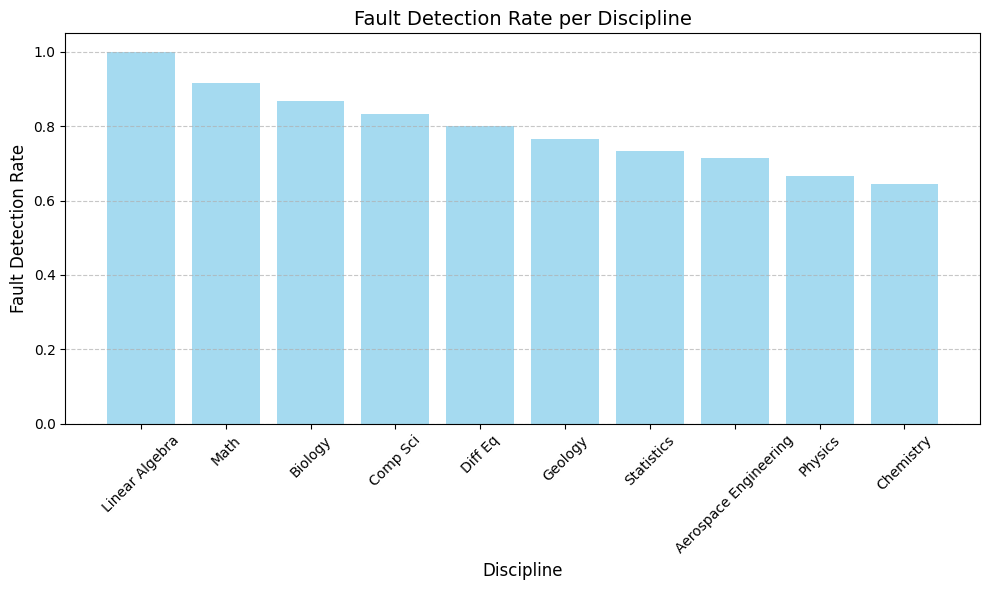

Human detection rate: 79.39698492462311
Claude detection rate: 79.66101694915254


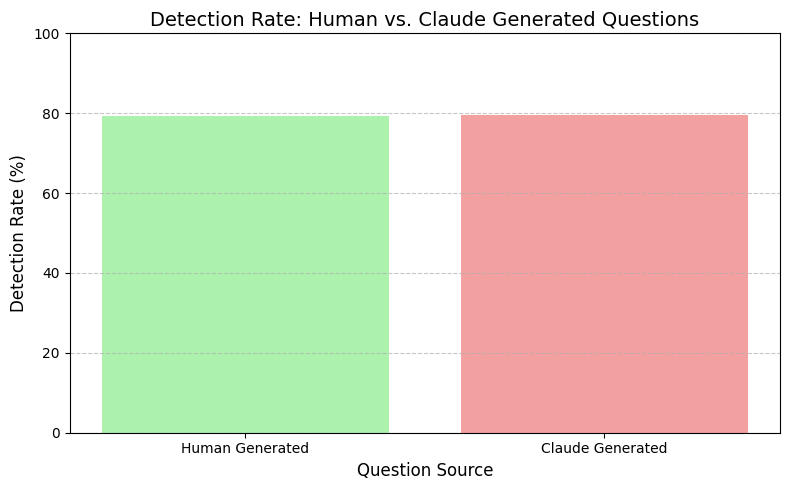

In [4]:
# Load the dataset
df = pd.read_excel('CSE584_Dataset.xlsx')

# Calculate overall detection rate
yn = [i for i in df['Detection'] if i != 'nan']
detection_rate = sum(1 for j in yn if j == 'Y') / len(yn) * 100
print(f"Overall Detection Rate: {detection_rate:.2f}%")

# Initialize dictionaries for fault detection rate and total questions
disc_dict = {}
num_dict = {}

for i, j in zip(df['Discipline'], df['Detection']):
    if i == 'Claude' or i == 'nan':
        continue
    if type(i) != str:
        continue

    i = i.strip()
    num_dict[i] = num_dict.get(i, 0) + 1

    if j == 'Y':
        disc_dict[i] = disc_dict.get(i, 0) + 1

# Print dictionaries
print("Fault Detections (disc_dict):", disc_dict)
print("Total Questions (num_dict):", num_dict)

# Calculate and sort fault detection rate for plotting
fault_rates = {discipline: disc_dict.get(discipline, 0) / num_dict[discipline] for discipline in num_dict}
sorted_disciplines = sorted(fault_rates, key=fault_rates.get, reverse=True)
sorted_rates = [fault_rates[discipline] for discipline in sorted_disciplines]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_disciplines, sorted_rates, alpha=0.75, color='skyblue')
plt.xlabel('Discipline', fontsize=12)
plt.ylabel('Fault Detection Rate', fontsize=12)
plt.title('Fault Detection Rate per Discipline', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('detection_rates.pdf')
plt.show()

human_df = df.iloc[1:200]  # Rows 2 through 200 (Python index starts at 0)
claude_df = df.iloc[203:263]  # Rows 204 through 263

# Calculate detection rates for each group
human_yn = [i for i in human_df['Detection'] if i != 'nan']
human_detection_rate = sum(1 for j in human_yn if j == 'Y') / len(human_yn) * 100

claude_yn = [i for i in claude_df['Detection'] if i != 'nan']
claude_detection_rate = sum(1 for j in claude_yn if j == 'Y') / len(claude_yn) * 100

# Prepare data for plotting
categories = ['Human Generated', 'Claude Generated']
detection_rates = [human_detection_rate, claude_detection_rate]

print(f"Human detection rate: {human_detection_rate}")
print(f"Claude detection rate: {claude_detection_rate}")

# Plot histogram for Human vs Claude
plt.figure(figsize=(8, 5))
plt.bar(categories, detection_rates, alpha=0.75, color=['lightgreen', 'lightcoral'])
plt.xlabel('Question Source', fontsize=12)
plt.ylabel('Detection Rate (%)', fontsize=12)
plt.title('Detection Rate: Human vs. Claude Generated Questions', fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('human_vs_claude_detection_rates.pdf')
plt.show()